# Text classification - IMDB Dataset

In [1]:
!pip install transformers[sentencepiece] datasets

## Datasets library

In [2]:
from datasets import list_datasets
list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookcorpusopen'

In [3]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

Found cached dataset imdb (/Users/rajeshkanna/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [4]:
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [5]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

In [6]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Loading cached shuffled indices for dataset at /Users/rajeshkanna/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-b30490d9bb1910a8.arrow


Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [7]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [8]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [9]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [10]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [11]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Loading cached shuffled indices for dataset at /Users/rajeshkanna/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-25a13d1ede6e3cb3.arrow


Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [12]:
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [13]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [15]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"There is an awful lot wrong with this picture, beginning with a script that is both obvious and redundant. Courtney Cox plays a comic book artist who escapes to a small desert town after being raped twice in the big city. She immediately is stalk...",0
1284,Blank Check is a movie that I saw on TV one day and like most movies they air on TV Blank Check wasn't that good. First of all no one I have ever met has seen Blank Check and that includes people that grew up in the 90s. Also Blank Check won't be...,0
408,"When I tell people that I review movies as a hobby, the first thing they say is ""What do you think of such-and-such movie?"" There are a couple of problems here. Firstly, there is the probable chance that I've not seen it and thus, I ruin my reput...",0
1282,"AG was an excellent presentation of drama, suspense and thriller that is so rare to American TV. Sheriff Lucas gave many a viewer the willies. We rooted for Caleb as he strove to resist the overtures of Sheriff Lucas. We became engrossed and fear...",1
1447,To say this film is simply a demonisation of Catholics and a misrepresentation of history is untrue. That is not what this film is.<br /><br />What this film is is a comment on the abuses of the Church (although this could be substituted for any ...,1
1144,"The story idea is excellent. Unfortunately, the execution lets it down.<br /><br />The movie lacks pace, for one thing. It should be an exciting ride, but it is slow and more than a little boring.<br /><br />I think the problem's mainly in the sc...",0
1381,"I got hooked on this as apparently ABC has licensed this show to Pearl TV in Hong Kong. It caught be my surprise, as it was a break from listening to anything Chinese. But i started getting reeled in, as the cast and the story lines are just NYC ...",1
181,"There have been so many many films based on the same theme. single cute girl needs handsome boy to impress ex, pays him and then (guess what?) she falls in love with him, there's a bit of fumbling followed by a row before everyone makes up before...",0
1183,"...because this was simply awful. 101 Dalamatians was funny even if formulaic, but this is nothing more than puerile drivel. The same plot except with the story excised from it; the world's most intelligent and horribly annoying macaw; Tim McInne...",0
1103,The plot of this terrible film is so convoluted I've put the spoiler warning up because I'm unsure if I'm giving anything away. The audience first sees some man in Jack the Ripper garb murder an old man in an alley a hundred years ago. Then we're...,0


In [16]:
df.loc[0, 'text']

'I have no idea how a Texan (the director, Douglas McGrath) and the American actress Gwyneth Paltrow ever pulled this off but seeing this again will remind you what all the fuss about Ms. Paltrow was in the first place! I had long since gone off the woman and still feel she is rather dull in her Oscar-winning "Shakespeare In Love" performance but she gets all the beats right here--she is nigh on perfect as Emma Woodhouse. She may have won her Oscar for Shakespeare but she should be remembered for this.<br /><br />Of course, she\'s surrounded by a great supporting cast including Toni Collette, Greta Scacchi, Juliette Stevenson et al...Jeremy Northam is very appealing as the love interest, even if the script wallows a bit in his declaration of love to Paltrow (in the process, allowing all of the tension to drain out of their relationship); several years on, Ewan\'s hair is a little easier to take than it was in \'96 and, personally, I find puckish Alan Cumming a grating presence in anyth

In [17]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

'I have no idea how a Texan (the director, Douglas McGrath) and the American actress Gwyneth Paltrow ever pulled this off but seeing this again will remind you what all the fuss about Ms. Paltrow was in the first place! I had long since gone off the woman and still feel she is rather dull in her Oscar-winning "Shakespeare In Love" performance but she gets all the beats right here--she is nigh on perfect as Emma Woodhouse. She may have won her Oscar for Shakespeare but she should be remembered for this.Of course, she\'s surrounded by a great supporting cast including Toni Collette, Greta Scacchi, Juliette Stevenson et al...Jeremy Northam is very appealing as the love interest, even if the script wallows a bit in his declaration of love to Paltrow (in the process, allowing all of the tension to drain out of their relationship); several years on, Ewan\'s hair is a little easier to take than it was in \'96 and, personally, I find puckish Alan Cumming a grating presence in anything nowadays

In [18]:
df.label.value_counts()

0    806
1    794
Name: label, dtype: int64

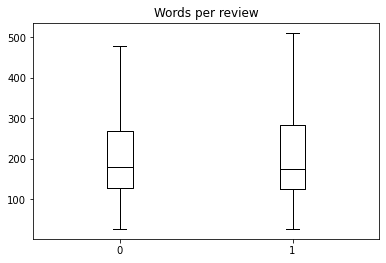

In [19]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [20]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
36,"Brilliant execution in displaying once and for all, this time in the venue of politics, of how ""good intentions do actually pave the road to hell"". Excellent!",1,27
244,Allison Dean's performance is what stands out in my mind watching this film. She balances out the melancholy tone of the film with an iridescent energy. I would like to see more of her.,1,34
351,A movie best summed up by the scene where a victim simulates disembowelment by pulling some poor animal's intestines out from under her T-shirt. Too terrible for words.,0,28
1205,One of my favorite scenes is at the beginning when guests on a private yacht decide to take an impromptu swim - in their underwear! Rather risqué for 1931!,1,29
1266,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34
1296,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32


In [21]:
imdb.reset_format()

## Tokenizer

In [22]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

  0%|          | 0/1 [00:00<?, ?ba/s]

Loading cached processed dataset at /Users/rajeshkanna/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-a73995c6e2308a4f.arrow


  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [23]:
print(imdb_encoded['train'][0])

{'text': 'I have no idea how a Texan (the director, Douglas McGrath) and the American actress Gwyneth Paltrow ever pulled this off but seeing this again will remind you what all the fuss about Ms. Paltrow was in the first place! I had long since gone off the woman and still feel she is rather dull in her Oscar-winning "Shakespeare In Love" performance but she gets all the beats right here--she is nigh on perfect as Emma Woodhouse. She may have won her Oscar for Shakespeare but she should be remembered for this.<br /><br />Of course, she\'s surrounded by a great supporting cast including Toni Collette, Greta Scacchi, Juliette Stevenson et al...Jeremy Northam is very appealing as the love interest, even if the script wallows a bit in his declaration of love to Paltrow (in the process, allowing all of the tension to drain out of their relationship); several years on, Ewan\'s hair is a little easier to take than it was in \'96 and, personally, I find puckish Alan Cumming a grating presence

## Tiny IMDB

In [24]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTokenClassification',
 'AutoModelForUniversalSegmentation',
 'AutoModelForVideoClassification',
 'AutoModelForVision2Seq',
 'AutoModelForVisualQuestionAnswering',
 'AutoModelForZeroShotObjectDetection',
 'AutoModelWithLMHead']

In [25]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bia

In [26]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

Loading cached shuffled indices for dataset at /Users/rajeshkanna/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-b143ea289760a98c.arrow


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Loading cached processed dataset at /Users/rajeshkanna/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-a3949ed71497d5cf.arrow


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [27]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=0,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
include_inputs_for_metrics=False,
jit_mode_eval=False,
label_n

In [28]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss
1,0.684900,0.696010
2,0.657700,0.694365


In [29]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[-0.25334504,  0.00767712],
       [-0.31422487,  0.02675657],
       [-0.20508033,  0.01080074],
       [-0.24893883,  0.00353542],
       [-0.18227902,  0.00955394],
       [-0.25881848,  0.022152  ],
       [-0.2517474 , -0.00778796],
       [-0.28395483,  0.01602553],
       [-0.31733102,  0.02297897],
       [-0.30352142,  0.02915775]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.7600803971290588, 'test_runtime': 2.4939, 'test_samples_per_second': 4.01, 'test_steps_per_second': 0.802})

In [30]:
preds.predictions.shape

(10, 2)

In [31]:
preds.predictions.argmax(axis=-1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.3

In [34]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [35]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  compute_metrics=get_accuracy,
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.628000,0.688059,0.500000
2,0.587800,0.682205,0.500000


## Training run

In [43]:
batch_size = 12
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [44]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.453700,0.347309,0.857500
2,0.224500,0.373187,0.852500


In [45]:


trainer.evaluate()

{'eval_loss': 0.3731873035430908,
 'eval_accuracy': 0.8525,
 'eval_runtime': 95.1509,
 'eval_samples_per_second': 4.204,
 'eval_steps_per_second': 0.357,
 'epoch': 2.0}

In [46]:
trainer.save_model()

In [47]:
model_name

'distilbert-base-cased-finetuned-imdb'

In [48]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

[{'label': 'LABEL_0', 'score': 0.7440603375434875}]

In [49]:
classifier('This was beyond incredible')

[{'label': 'LABEL_1', 'score': 0.6378265023231506}]